In [10]:
from pathlib import Path
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

from src.datamodule import InariaDataModule

In [11]:
DATA = Path("/media/sambhav/30AC4696AC46568E/datasets/inaria/train")

In [12]:
dm = InariaDataModule(DATA, batch_size=25, tile_shape=(512, 512), num_workers=0)
dm.setup("fit")
loader = dm.train_dataloader()

In [13]:
def plot_25_examples(dataloader):
    fig = plt.figure(figsize = (15, 15))
    axes = list()
    images, masks = next(iter(dataloader))
    count = 0
    for row in range(5):
        for col in range(5):
            ax = plt.subplot2grid((5, 5), (row, col))
            ax.imshow(images[count].permute(2, 1, 0))
            ax.imshow(masks[count].permute(2, 1, 0), alpha = .5)
            ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
            count+=1

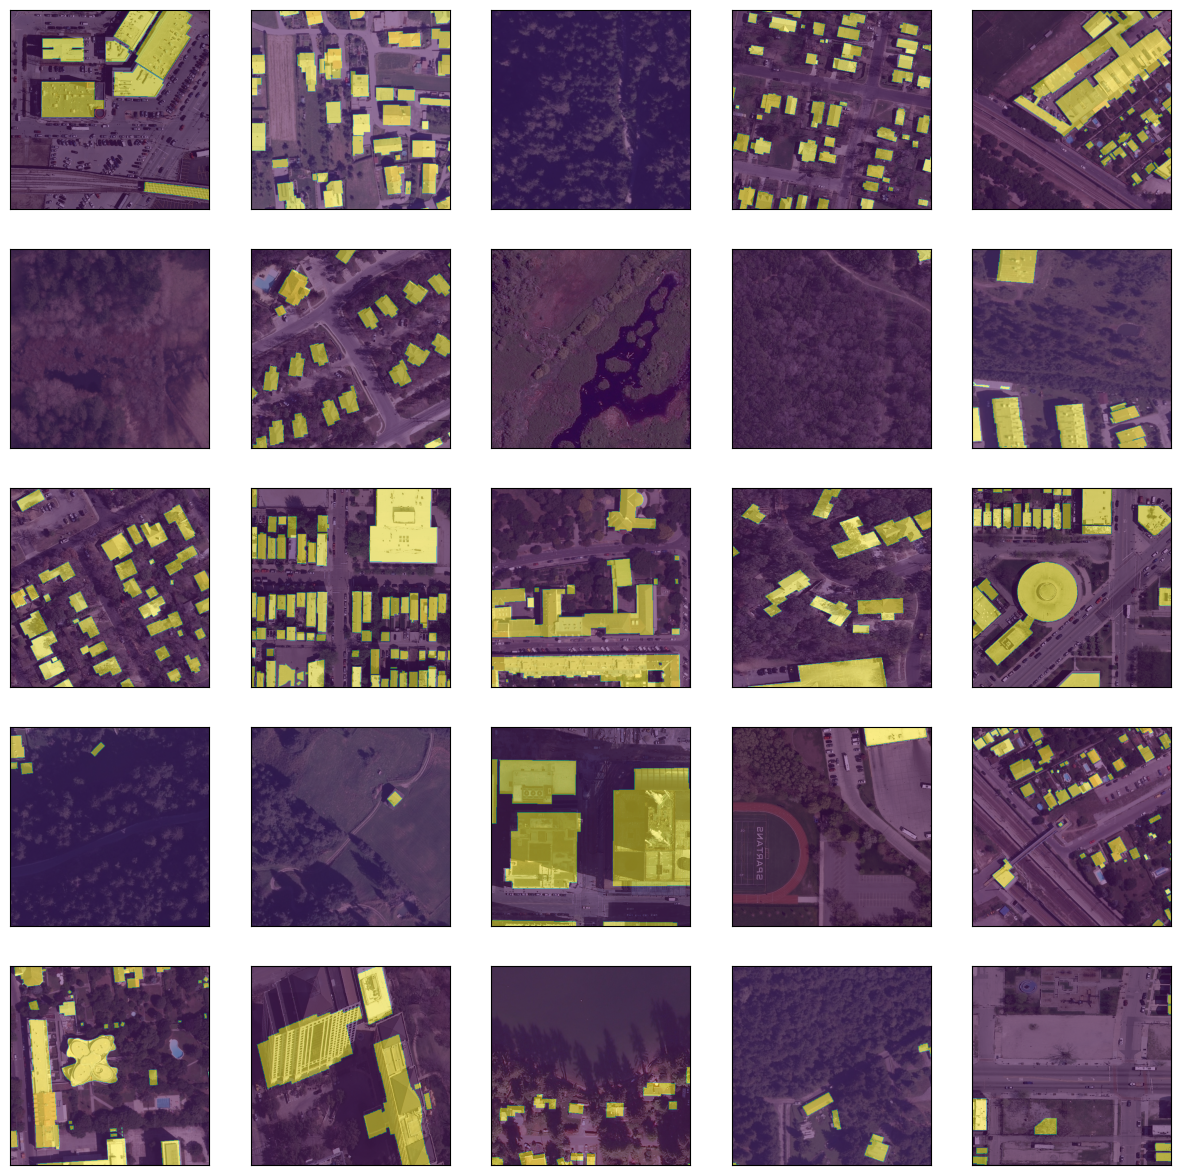

In [14]:
plot_25_examples(loader)

In [15]:
for mask_path in (DATA / "gt").iterdir():
    ones = list() 
    zeros = list() 
    with rio.open(mask_path) as mask:
        img = mask.read().squeeze()
        ones.append(np.sum(img == 255))
        zeros.append(np.sum(img == 0))

print(sum(ones))
print(sum(zeros))

10644459
14355541


In [16]:
imbalance = (sum(ones) * 100)  / (sum(zeros) + sum(ones))
print(f"{imbalance:.2f}% of pixels belong to the positive class")

42.58% of pixels belong to the positive class
